In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

**Problema 3**: A constante de Stefan-Boltzman, $\sigma$, relaciona a energia total emitida por um corpo negro com a sua temperatura. Ela é dada por

$$
\sigma=\frac{\pi^2k_b^4}{60\hbar^3c^2}\zeta(4),
$$
onde $\zeta(s)$ é função zeta de Riemann. A função zeta de Riemann pode ser expressa na forma na forma integral:
$$
\zeta(s)=\frac{1}{\Gamma(s)}\int_0^{\infty}\frac{x^{s-1}e^{-x}}{1-e^{-x}}dx,
$$
onde $\Gamma(s)=(s-1)!$ é a função Gamma. Utilizando *importance sampling*, gere amostras aleatórias de $x$ de uma distribuição exponencial, $\omega(x)=e^{-x}$ para $x\ge0$, que corresponde ao termo $e^{-x}$ no integrando. Reescreva a integral como
$$
\zeta(s)=\frac{1}{\Gamma(s)}\mathbb{E}\left[\frac{x^{s-1}}{1-e^{-x}}dx\right].
$$
Compare seu resultado de Monte Carlo com o valor exato:
$$
\zeta(4)=\frac{\pi^4}{90}.
$$

In [2]:
def direct_zeta(N, s):
    S = 0  # Inicializa a soma
    for i in range(1, N+1):
        x_i = np.random.uniform(0, 1)  # Gera um número aleatório uniforme entre 0 e 1
        x_i = -np.log(x_i) #importance sampling
        S += (1/6)*(x_i ** (s-1))/(1-np.exp(-x_i))  # Atualiza a soma de zetta (soma acumulada)
    
    return S / N  # Retorna a média ponderada Σ/N

In [3]:
# Exemplo de uso da função
N = 1000000  # Número de iterações
s = 4  # Valor de s
resultado = direct_zeta(N, s)
resultado

1.0818482743618953

Diferença do valor exato

In [4]:
Delta_zetta=np.pi**4/90-resultado
Delta_zetta

0.0004749593492425763

**Problema 4:** Considere a integral de uma fução...

### **Item (a)**

In [5]:
def integral_I(N,d):
    S = 0  # Inicializa a soma
    for i in range(1,N+1):
        for j in range(0,d):
            x_i[j]=np.random.uniform(0,1) # Gera um número aleatório uniforme entre 0 e 1
            S+=np.exp(-abs(x_i[j]))**2    # Atualiza a soma de zetta (soma acumulada)

    return S/N


In [6]:

def integral_I(N, d):
    """
    Aproximação de uma integral pelo método de Monte Carlo, calculando manualmente o módulo 
    (norma euclidiana) e mantendo um laço explícito sobre N.

    Args:
        N (int): Número de amostras aleatórias.
        d (int): Dimensão da integral.

    Returns:
        float: Valor aproximado da integral.
    """
    S = 0  # Inicializa a soma
    
    for i in range(N):  # Laço sobre as N amostras
        # Gera um vetor aleatório de tamanho d, com valores uniformes entre 0 e 1
        x_i = np.random.uniform(0, 1, d)
        
        # Calcula o módulo (norma euclidiana) do vetor x_i manualmente
        # Fórmula: ||x|| = sqrt(x_1^2 + x_2^2 + ... + x_d^2)
        modulus = np.sqrt(np.sum(x_i**2))
        
        # Soma a função objetivo avaliada no módulo
        S += np.exp(-modulus**2)

    # Retorna a média acumulada da soma para aproximar o valor da integral
    return S / N



In [7]:
N = 100000  # Número de amostras
d = 10      # Dimensão

resultado = integral_I(N, d)
print(f"Valor aproximado da integral: {resultado}")


Valor aproximado da integral: 0.054042845301512404


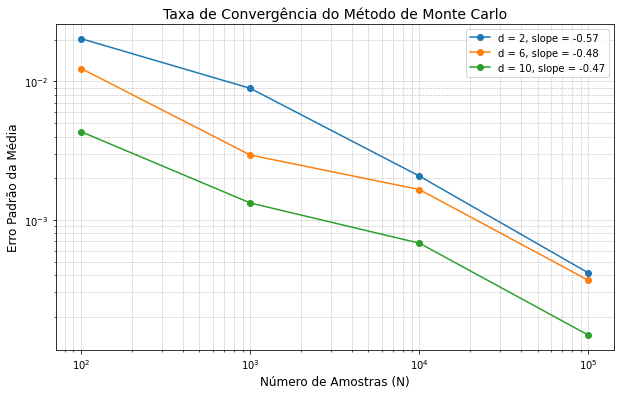

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular a integral aproximada usando Monte Carlo
def monte_carlo_integral(N, d):
    """
    Calcula a integral \int_{[0,1]^d} e^{-|x|^2} dx por Monte Carlo.
    
    Args:
        N (int): Número de amostras.
        d (int): Dimensão da integral.
    
    Returns:
        float: Valor aproximado da integral.
    """
    samples = np.random.uniform(0, 1, size=(N, d))  # Amostras no cubo [0, 1]^d
    moduli_squared = np.sum(samples**2, axis=1)     # Calcula |x|^2
    integral = np.mean(np.exp(-moduli_squared))     # Média das avaliações da função
    return integral

# Função para calcular erro padrão da média e a taxa de convergência
def convergence_rate(d, N_samples_list):
    """
    Calcula o erro padrão da média e taxa de convergência para diferentes números de amostras.
    
    Args:
        d (int): Dimensão da integral.
        N_samples_list (list of int): Lista com o número de amostras.
    
    Returns:
        tuple: Lista de erros padrão da média e taxas de convergência.
    """
    errors = []
    for N in N_samples_list:
        estimates = [monte_carlo_integral(N, d) for _ in range(10)]  # Média em 10 execuções
        error_std = np.std(estimates)                                # Erro padrão
        errors.append(error_std)
    
    # Calcula a taxa de convergência: log-log slope
    log_N = np.log(N_samples_list)
    log_errors = np.log(errors)
    slope = np.polyfit(log_N, log_errors, 1)[0]  # Coeficiente angular da reta
    return errors, slope

# Parâmetros
dimensions = [2, 6, 10]
N_samples_list = [10**i for i in range(2, 6)]  # Amostras variando de 10^2 a 10^5

# Plotagem
plt.figure(figsize=(10, 6))
for d in dimensions:
    errors, slope = convergence_rate(d, N_samples_list)
    plt.plot(N_samples_list, errors, label=f'd = {d}, slope = {slope:.2f}', marker='o')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Número de Amostras (N)', fontsize=12)
plt.ylabel('Erro Padrão da Média', fontsize=12)
plt.title('Taxa de Convergência do Método de Monte Carlo', fontsize=14)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
